# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [35]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [36]:
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [37]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [38]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [39]:
# Extract all rows of data
table = soup.find(class_ = 'table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [40]:
# Create an empty list
table_data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    row_header = [value.text.strip() for value in row.find_all('th')]
    row_data = [value.text.strip() for value in row.find_all('td')]
    if row_header:
        table_data.append(row_header)
    if row_data: 
        table_data.append(row_data)

In [41]:
# Preview list
table_data[0:10]

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']]

In [42]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(table_data[1:], columns=table_data[0])

In [43]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [44]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [45]:
# Change data types for data analysis
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [46]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [47]:
# 1. How many months are there on Mars?
mars_df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [48]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].nunique()

1867

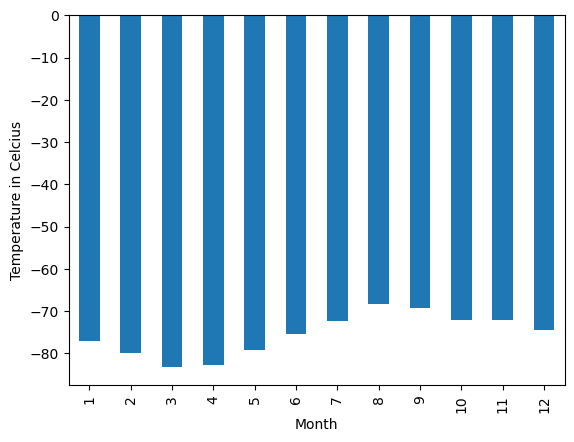

In [49]:
# Plot the average temperature by month
avg_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

plt.show()

In [50]:
avg_temp_desc = avg_temp.sort_values()

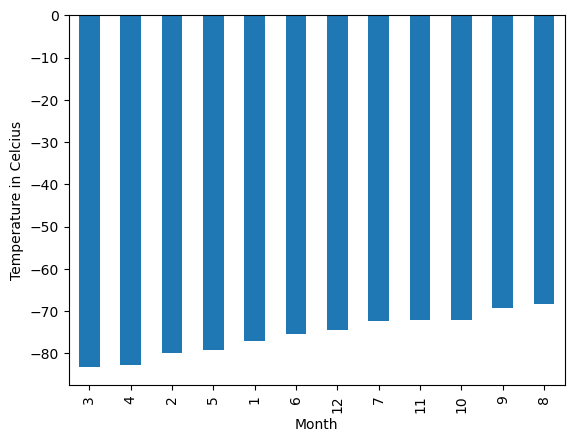

In [51]:
# Identify the coldest and hottest months in Curiosity's location
avg_temp_desc.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

plt.show()

In [52]:
# 3. What is the average low temperature by month?
avg_temp = mars_df['min_temp'].groupby(mars_df['month']).mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [53]:
# 4. Average pressure by Martian month
avg_press = mars_df['pressure'].groupby(mars_df['month']).mean()
avg_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [54]:
avg_press_asc = avg_press.sort_values()

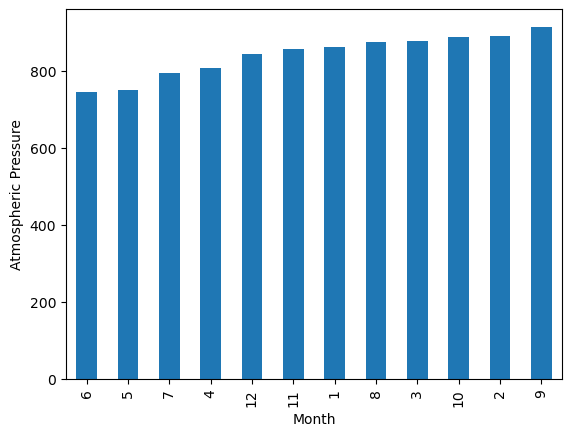

In [55]:
# Plot the average pressure by month
avg_press_asc.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

plt.show()

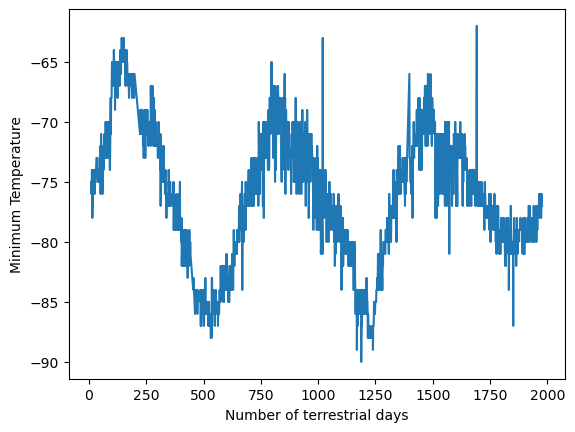

In [56]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')

plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [57]:
mars_df[mars_df['ls'] == 0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
304,320,2013-08-01,351,0,1,-75.0,853.0
305,319,2013-08-02,352,0,1,-77.0,854.0
925,954,2015-06-19,1019,0,1,-81.0,849.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
1579,1606,2017-05-06,1688,0,1,-76.0,840.0
1580,1610,2017-05-07,1689,0,1,-75.0,840.0


In [58]:
# Define the dates for when Mars begins and completes its orbit around the Sun.
initial_ls_date = datetime(2013, 8, 1)
final_ls_date = datetime(2015, 6, 19)

# Find the difference between the recorded dates to estimate about how many terrestrial days exist in a Martian year. 
(final_ls_date - initial_ls_date).days

687

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [59]:
import os

# Check if the directory exists, if not, create it
output_directory = "Output"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Write the data to a CSV
mars_df.to_csv(os.path.join(output_directory, "mars_data.csv"), index=False)

In [60]:
browser.quit()